In [2]:
import numpy as np 
import pandas as pd 
import sys
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data_salary = pd.read_csv("Levels_Fyi_Salary_Data.csv")
data_salary.head(5)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


# Data filtering and cleaning

In [4]:
data_salary_copy = data_salary[[ 'totalyearlycompensation', 'company',  'title', 
       'location', 'yearsofexperience']]

newsalarydata = data_salary.dropna(subset=['company'])
newsalarydata[newsalarydata['company'].isna()]
title_data = pd.unique(newsalarydata['title'])
location_data = pd.unique(newsalarydata['location'])
company_data = pd.unique(newsalarydata['company'])

np.set_printoptions(threshold=sys.maxsize)
print("Please select your position: \n", np.array(title_data))
print("Please select your location: \n", np.array(location_data))



Please select your position: 
 ['Product Manager' 'Software Engineer' 'Software Engineering Manager'
 'Data Scientist' 'Solution Architect' 'Technical Program Manager'
 'Human Resources' 'Product Designer' 'Marketing' 'Business Analyst'
 'Hardware Engineer' 'Sales' 'Recruiter' 'Mechanical Engineer'
 'Management Consultant']
Please select your location: 
 ['Redwood City, CA' 'San Francisco, CA' 'Seattle, WA' 'Sunnyvale, CA'
 'Mountain View, CA' 'Redmond, WA' 'Bellevue, WA' 'Menlo Park, CA'
 'London, EN, United Kingdom' 'Cupertino, CA' 'New York, NY'
 'Los Gatos, CA' 'Dublin, DN, Ireland' 'Baltimore, MD' 'Sacramento, CA'
 'Hillsboro, OR' 'Cambridge, EN, United Kingdom' 'Aliso Viejo, CA'
 'San Jose, CA' 'Bangalore, KA, India' 'Minsk, HM, Belarus'
 'Palo Alto, CA' 'Kirkland, WA' 'Washington, DC' 'Vancouver, BC, Canada'
 'Austin, TX' 'Boston, MA' 'San Diego, CA' 'New Orleans, LA'
 'Santa Clara, CA' 'Irvine, CA' 'Pittsburgh, PA' 'San Ramon, CA'
 'Los Angeles, CA' 'Folsom, CA' 'Charleston, SC

In [ ]:

pos = input("enter your position")
loca = input("enter your location")

        
#newsalarydata = pd.get_dummies(newsalarydata, columns=['title', 'location','company'])


In [25]:
position= "title_"+pos
location = "location_"+loca


In [28]:

Q_salarydata= newsalarydata[["totalyearlycompensation",'yearsofexperience', location, position]]
Q_salarydata

Q_1 = Q_salarydata.quantile(0.25)
Q_3 = Q_salarydata.quantile(0.75)
IQR = Q_3-Q_1
Q_salarydata = Q_salarydata[~((Q_salarydata < (Q_1 - 1.5 *IQR)) | (Q_salarydata > (Q_3 + 1.5 * IQR))).any(axis=1)]

Q_salarydata


,totalyearlycompensation,yearsofexperience,"location_Richmond, VA, United States",title_Software Engineer
0,127000,1.5,0,0
1,100000,5.0,0,1
2,310000,8.0,0,0
3,372000,7.0,0,0
4,157000,5.0,0,1
...,...,...,...,...
62637,327000,10.0,0,1
62638,237000,2.0,0,1
62639,220000,14.0,0,1
62640,280000,8.0,0,1


In [29]:
train_data = Q_salarydata.sample(frac=0.6, random_state=1)
x = Q_salarydata.drop(train_data.index)
test_data = x.sample(frac=0.5,random_state=1)
val_data = Q_salarydata.drop(test_data.index)

ytrain = train_data['totalyearlycompensation']
xtrain= train_data.drop(columns=['totalyearlycompensation'])
ytest = test_data['totalyearlycompensation']
xtest= test_data.drop(columns=['totalyearlycompensation'])
yval = val_data['totalyearlycompensation']
xval = val_data.drop(columns=['totalyearlycompensation'])



In [42]:
lm_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=3)
])
lm_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 5, momentum=0.4, nesterov=True), loss= 'mean_absolute_error')
# linear_regression.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 5), loss= 'mean_absolute_error')

hist = lm_model.fit(xtrain,ytrain,epochs=500)

Epoch 1/500
1095/1095 [==============================] - 4s 3ms/step - loss: 113704.0078
Epoch 2/500
1095/1095 [==============================] - 2s 2ms/step - loss: 96597.2812
Epoch 3/500
1095/1095 [==============================] - 2s 2ms/step - loss: 94185.5938
Epoch 4/500
1095/1095 [==============================] - 1s 1ms/step - loss: 91912.2578
Epoch 5/500
1095/1095 [==============================] - 1s 1ms/step - loss: 89765.6484
Epoch 6/500
1095/1095 [==============================] - 1s 1ms/step - loss: 87764.0781
Epoch 7/500
1095/1095 [==============================] - 1s 1ms/step - loss: 85889.4609
Epoch 8/500
1095/1095 [==============================] - 1s 1ms/step - loss: 84141.2969
Epoch 9/500
1095/1095 [==============================] - 1s 1ms/step - loss: 82520.4844
Epoch 10/500
1095/1095 [==============================] - 1s 1ms/step - loss: 81018.1875
Epoch 11/500
1095/1095 [==============================] - 1s 1ms/step - loss: 79636.9375
Epoch 12/500
1095/1095 [=====

In [43]:
lm_model.evaluate(xtest,ytest)

365/365 [==============================] - 1s 1ms/step - loss: 65509.5156


65509.515625

In [44]:
q1_predict = lm_model.predict(xtest).flatten()
def RMSE(y_predict, y_test):
    return np.sqrt(np.square(np.subtract(y_test,y_predict)).mean())
RMSE(q1_predict,ytest)

83947.01028341177

In [45]:
temp_df = pd.DataFrame(columns=['p','y'])

temp_df['p'] = q1_predict
temp_df['y'] = ytest.to_numpy()

temp_df


,p,y
0,194962.593750,90000
1,174052.125000,179000
2,153141.640625,144000
3,146171.484375,199000
4,167081.953125,427000
...,...,...
11669,167081.953125,250000
11670,157149.421875,137000
11671,181022.281250,305000
11672,233821.171875,368000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


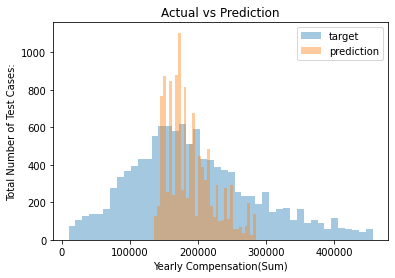

In [46]:
sns.distplot(ytest, label='target', kde=False)
sns.distplot(q1_predict, label='prediction', kde=False)

plt.legend()

plt.ylabel('Total Number of Test Cases:')
plt.xlabel('Yearly Compensation(Sum)')
plt.title('Actual vs Prediction')

plt.show()

In [47]:
Exp_years = input("Please enter how many years of experience you have:")
Exp_years = float(Exp_years)
prediction =[[Exp_years,1,1]]
result = lm_model.predict(prediction)

print( "If you have a  " + position +  " based on "+ str() + " and in " + loca + ", you will get: " + str(result[0][0]))

Please enter how many years of experience you have:5
If you have a  title_Software Engineer based on  and in Richmond, VA, United States, you will get: 181021.53


In [50]:
print("select your company: \n", np.array(company_data))

select your company: 
 ['Oracle' 'eBay' 'Amazon' 'Apple' 'Microsoft' 'Salesforce' 'Facebook'
 'Uber' 'Oath' 'Google' 'Netflix' 'Pinterest' 'Linkedin' 'Adobe'
 'LinkedIn' 'amazon' 'Symantec' 'Intel Corporation' 'Intel' 'Lyft' 'Sony'
 'Yelp' 'Airbnb' 'EPAM' 'SAP' 'VMWare' 'Twitter' 'Slack'
 'Tableau Software' 'Cisco' 'Mixpanel' 'Zynga' 'MICROSOFT' 'Dropbox' 'IBM'
 'Shutterstock' 'Walmart Labs' 'linkedin' 'facebook' 'microsoft' 'Twilio'
 'Qualcomm' 'Intercom' 'Tesla' 'Expedia' 'GE Digital' 'CA Technologies'
 'Yahoo' 'Starbucks' 'Toyota Research Institute' 'Activision'
 'PlayStation' 'Squarespace' 'Intuit' 'Blackbaud' 'Citadel' 'Bloomberg'
 'ThoughtWorks' 'Yandex' 'AWS' 'vmware' 'Capital One' 'Nike'
 'Mckinsey & Company' 'Workday' 'Capital Group' 'Liberty Mutual' 'Splunk'
 'Mutual of Omaha' 'Zendesk' 'samsung' 'Autodesk' 'Samsung' 'Credit Karma'
 'Dell Technologies' 'Peloton' 'Proofpoint' 'Northwestern Mutual' 'Box'
 'SmartThings' 'ebay' 'BOOKING.COM' 'Akamai' 'Amazon web services' 'Hulu'


In [53]:
while(True):
    input_position = input("enter position")
    input_location = input("enter location")
    input_company = input("enter company")
    if (input_position in title_data and input_location in location_data and input_company in company_data):
        break

company = "company_"+input_company
position= "title_" + input_position
location = "location_" + input_location
print(f"You enter {input_company} as your company, {input_position} as your position and {input_location} as your location")

enter positionSoftware Engineer
enter locationRichmond, VA, United States
enter companyDelphix
You enter Delphix as your company, Software Engineer as your position and Richmond, VA, United States as your location


In [55]:
Q2_saldata = newsalarydata[["totalyearlycompensation",'yearsofexperience', location, position, company]]
Q2_train_data = Q2_saldata.sample(frac=0.8, random_state=1)
Q2_test_data = Q2_saldata.drop(train_data.index)
Q2_ytrain_data = Q2_train_data['totalyearlycompensation']

Q2_xtrain_data= Q2_train_data.drop(columns=['totalyearlycompensation'])
Q2_ytest_data = Q2_test_data['totalyearlycompensation']

Q2_xtest_data= Q2_test_data.drop(columns=['totalyearlycompensation'])

In [57]:
Q2_lg_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=4)
])
Q2_lg_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.0001), loss= 'mean_squared_error')

Q2_hist= Q2_lg_model.fit(Q2_xtrain_data,Q2_ytrain_data,epochs=100,validation_split = 0.2)

Epoch 1/100
1253/1253 [==============================] - 2s 2ms/step - loss: 23585736704.0000 - val_loss: 21821945856.0000
Epoch 2/100
1253/1253 [==============================] - 2s 2ms/step - loss: 20781402112.0000 - val_loss: 20262260736.0000
Epoch 3/100
1253/1253 [==============================] - 2s 2ms/step - loss: 19503450112.0000 - val_loss: 19208404992.0000
Epoch 4/100
1253/1253 [==============================] - 2s 2ms/step - loss: 18612338688.0000 - val_loss: 18400092160.0000
Epoch 5/100
1253/1253 [==============================] - 2s 2ms/step - loss: 17982291968.0000 - val_loss: 17856208896.0000
Epoch 6/100
1253/1253 [==============================] - 2s 2ms/step - loss: 17543372800.0000 - val_loss: 17468745728.0000
Epoch 7/100
1253/1253 [==============================] - 2s 2ms/step - loss: 17217187840.0000 - val_loss: 17190969344.0000
Epoch 8/100
1253/1253 [==============================] - 2s 2ms/step - loss: 16993133568.0000 - val_loss: 16989040640.0000
Epoch 9/100
1253

In [61]:
Q2_lg_model.evaluate(Q2_xtest_data,Q2_ytest_data)

863/863 [==============================] - 1s 1ms/step - loss: 26102009856.0000


26102009856.0

In [65]:
predict_Q2 = Q2_lg_model.predict(Q2_xtest_data).flatten()
def RMSE(y_predict, y_test):
    return np.sqrt(np.square(np.subtract(y_test,y_predict)).mean())
RMSE(predict_Q2,Q2_ytest_data)

161561.17606024415

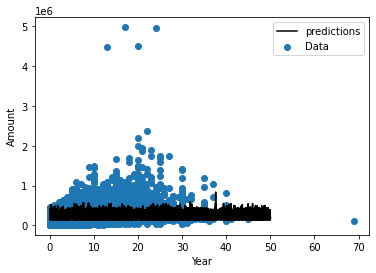

In [66]:
x = tf.linspace(0.0, 50, predict_Q2.shape[0])

plt.scatter(Q2_xtrain_data['yearsofexperience'], Q2_ytrain_data, label='Data')
plt.plot(x, predict_Q2, color='k', label='predictions')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


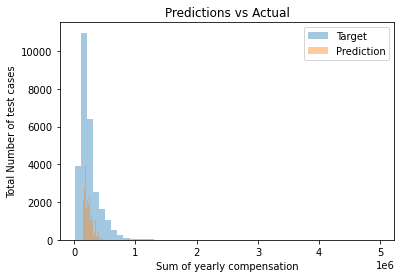

In [67]:
sns.distplot(Q2_ytest_data, label='Target', kde=False)
sns.distplot(predict_Q2, label='Prediction', kde=False)

plt.legend()

plt.ylabel('Total Number of test cases')
plt.xlabel('Sum of yearly compensation')
plt.title('Predictions vs Actual')

plt.show()

In [68]:
total_input_exp = input("Please enter how many years of experience you have:")
total_input_exp = float(total_input_exp)
prediction_input =[[total_input_exp,1,1,1]]
result2 = Q2_lg_model.predict(prediction_input)
print( "If accepted an offer for a " + input_position + " from " + input_company + " based on "+ str(total_input_exp) + " and in " + input_location + ", you will get: " + str(result2[0][0]))


Please enter how many years of experience you have:5
If accepted an offer for a Software Engineer from Delphix based on 5.0 and in Richmond, VA, United States, you will get: 194928.72


In [75]:
stay = input("How many years you will stay")
stay = float(stay)
prediction_input =[[total_input_exp+stay,1,1,1]]
Q2_lg_model.predict(prediction_input)
print("After working with "+str(input_company)+"for this "+str(stay)+"years,you will get "+str(result2[0][0]))


How many years you will stay3
After working with Delphixfor this 3.0years,you will get 194928.72
